## Introducing Geospatial Analysis with Python & Geojsonio

As a native New Yorker, I’d be a mess without Google Maps every single time I go anywhere else and things are suddenly not split by streets and avenues. We take these products for granted, but in reality, they’re an important point of convenience. Products like Google or Apple Maps are built on foundations of geospatial technology. At the center of these technologies are locations, their interactions and roles in a greater ecosystem of location services. 

With that said, this particular field of technology is referred to as Geospatial Analysis. Geospatial analysis involves applying statistical analysis to data which has a geographical or geometrical aspect. In this tutorial, we’ll use Python to learn the basics of acquiring geospatial data, handling it, and visualizing it. 

### Environment Setup 

This guide was written in Python 3.6. If you haven't already, download Python and Pip. Next, you’ll need to install several packages that we’ll use throughout this tutorial:

```
pip3 install geojsonio
pip3 install geopandas
pip3 install shapely
```


Lastly, you can download all the data for this workshops [here](). And now we're ready to start!


## Introduction

Anything in which location makes an impact on analysis or can be represented by location is likely going to be a geospatial problem. With different computational tools, we can create beautiful and meaningful visualizations that tell us about how location affects a given trend. To show this, we’ll use the python module `geojsonio` to visualize data across the United States. 

Data typically comes in the form of a few fundamental data types: strings, floats, integers, and booleans. Geospatial data, however, uses a different set of data types for its analyses. Using the `shapely` module, we’ll review what these different data types look like.

`shapely` has a class called `geometry` that contains different geometric objects. Using this module we'll import the needed data types:

In [25]:
from shapely.geometry import Point, Polygon

The simplest data type in geospatial analysis is the **Point** data type. Points are zero-dimensional objects representing a single location, or simply put, XY coordinates. In Python, this code looks like: 

In [26]:
p1 = Point(0,0)
print(p1)

POINT (0 0)


Notice that when we print `p1`, the output is `POINT (0 0)`. This indicated that the object returned isn't a built-in data type we'll see in Python. We can check this by asking Python to interpret whether or not the point is equivalent to the tuple `(0, 0)`:

In [27]:
print(p1 == (0,0))

False


Unsurprisingly, this returns `False`, and the reason for that is its type. If we print the type of `p1`, we *will* get a shapely Point object: 

In [28]:
print(type(p1))

<class 'shapely.geometry.point.Point'>


Next we have a **Polygon**, which is a two-dimensional surface that’s stored as a sequence of points that define the exterior. Because a polygon is composed of multiple points, the `shapely` polygon object takes a list of tuples as a parameter.

In [29]:
polygon = Polygon([(0,0),(1,1),(1,0)])

Oddly enough, the `shapely` Polygon object will not take a list of `shapely` points as a parameter. If we incorrectly input a Point, we'll get an error message.  

~~polygon = Polygon([Point(0,0), Point(1,1), Point(1,0)])~~ # Don't do this!

### Data Structures

**GeoJSON** is a format for representing geographic objects. It's different from regular json because it supports geometry types, such as: Point, LineString, Polygon, MultiPoint, MultiLineString, MultiPolygon, and GeometryCollection. 

Using geojson, making visualizations becomes suddenly easier, as you'll see in a later section. This is primarily because geojson allows us to store collections of geometric data types in one central structure.

**GeoPandas** is a Python module used to make working with geospatial data in python easier by extending the datatypes used by pandas to allow spatial operations on geometric types.

Typically, `geopandas` is abbreviated with `gpd` and is used to read geojson data intro a DataFrame. Below you can see that we've printed out five rows of a geojson DataFrame: 

In [54]:
import geopandas as gpd
states = gpd.read_file('states.geojson')
print(states.head())

  adm1_code          featurecla  \
0  USA-3514  Admin-1 scale rank   
1  USA-3515  Admin-1 scale rank   
2  USA-3516  Admin-1 scale rank   
3  USA-3517  Admin-1 scale rank   
4  USA-3518  Admin-1 scale rank   

                                            geometry id  scalerank  
0  POLYGON ((-89.59940899999999 48.010274, -89.48...  0          2  
1  POLYGON ((-111.194189 44.561156, -111.291548 4...  1          2  
2  POLYGON ((-96.601359 46.351357, -96.5389080000...  2          2  
3  (POLYGON ((-155.93665 19.05939, -155.90806 19....  3          2  
4  POLYGON ((-111.049728 44.488163, -111.050245 4...  4          2  


Just as with regular json and pandas dataframes, geojson and geopandas have functions which allow you to easily convert one to the other. Using the example dataset from above, we can convert the DataFrame to a geojson object using the `to_json()` function: 

In [55]:
states = states.to_json()
print(states)

{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"adm1_code": "USA-3514", "featurecla": "Admin-1 scale rank", "id": "0", "scalerank": 2}, "geometry": {"type": "Polygon", "coordinates": [[[-89.599409, 48.010274], [-89.488885, 48.013439], [-89.522695, 47.960535], [-89.613698, 47.819252], [-89.728006, 47.641976], [-89.842831, 47.464726], [-89.957656, 47.286907], [-90.131754, 47.292747], [-90.305852, 47.298018], [-90.47995, 47.303857], [-90.654048, 47.309128], [-90.857782, 47.212829], [-91.060974, 47.117047], [-91.264708, 47.021265], [-91.468442, 46.924966], [-91.592259, 46.87626], [-91.716618, 46.827607], [-91.840978, 46.778385], [-91.964794, 46.729706], [-92.011898, 46.711723], [-92.274879, 46.656145], [-92.264828, 46.095223], [-92.296583, 46.096282], [-92.5437, 45.985695], [-92.756968, 45.889912], [-92.899828, 45.705763], [-92.689221, 45.518436], [-92.765417, 45.267082], [-92.766477, 44.996143], [-92.796656, 44.776027], [-92.505072, 44.58392], [-9

Being able to easily convert geojson from one format to another gives us more freedom as to what we can do with our data, whether that be analyzing it, visualizating, manipulating it. 

Next we will review `geojsonio`, a tool used for visualizing geojson on the browser. Using the states dataset above, we'll visualize the United States as a series of Polygons. 

In [42]:
import geojsonio
geojsonio.display(states)

'http://geojson.io/#data=data:application/json,%7B%22type%22%3A%20%22FeatureCollection%22%2C%20%22features%22%3A%20%5B%7B%22id%22%3A%20%220%22%2C%20%22type%22%3A%20%22Feature%22%2C%20%22properties%22%3A%20%7B%22adm1_code%22%3A%20%22USA-3514%22%2C%20%22featurecla%22%3A%20%22Admin-1%20scale%20rank%22%2C%20%22id%22%3A%20%220%22%2C%20%22scalerank%22%3A%202%7D%2C%20%22geometry%22%3A%20%7B%22type%22%3A%20%22Polygon%22%2C%20%22coordinates%22%3A%20%5B%5B%5B-89.599409%2C%2048.010274%5D%2C%20%5B-89.488885%2C%2048.013439%5D%2C%20%5B-89.522695%2C%2047.960535%5D%2C%20%5B-89.613698%2C%2047.819252%5D%2C%20%5B-89.728006%2C%2047.641976%5D%2C%20%5B-89.842831%2C%2047.464726%5D%2C%20%5B-89.957656%2C%2047.286907%5D%2C%20%5B-90.131754%2C%2047.292747%5D%2C%20%5B-90.305852%2C%2047.298018%5D%2C%20%5B-90.47995%2C%2047.303857%5D%2C%20%5B-90.654048%2C%2047.309128%5D%2C%20%5B-90.857782%2C%2047.212829%5D%2C%20%5B-91.060974%2C%2047.117047%5D%2C%20%5B-91.264708%2C%2047.021265%5D%2C%20%5B-91.468442%2C%2046.924966%5D%2

Once this code is run, a [link](http://bl.ocks.org/d/fc2a461102fbca821d068ede93d8b811) is opened in the browser, displaying an interface as you see below: 

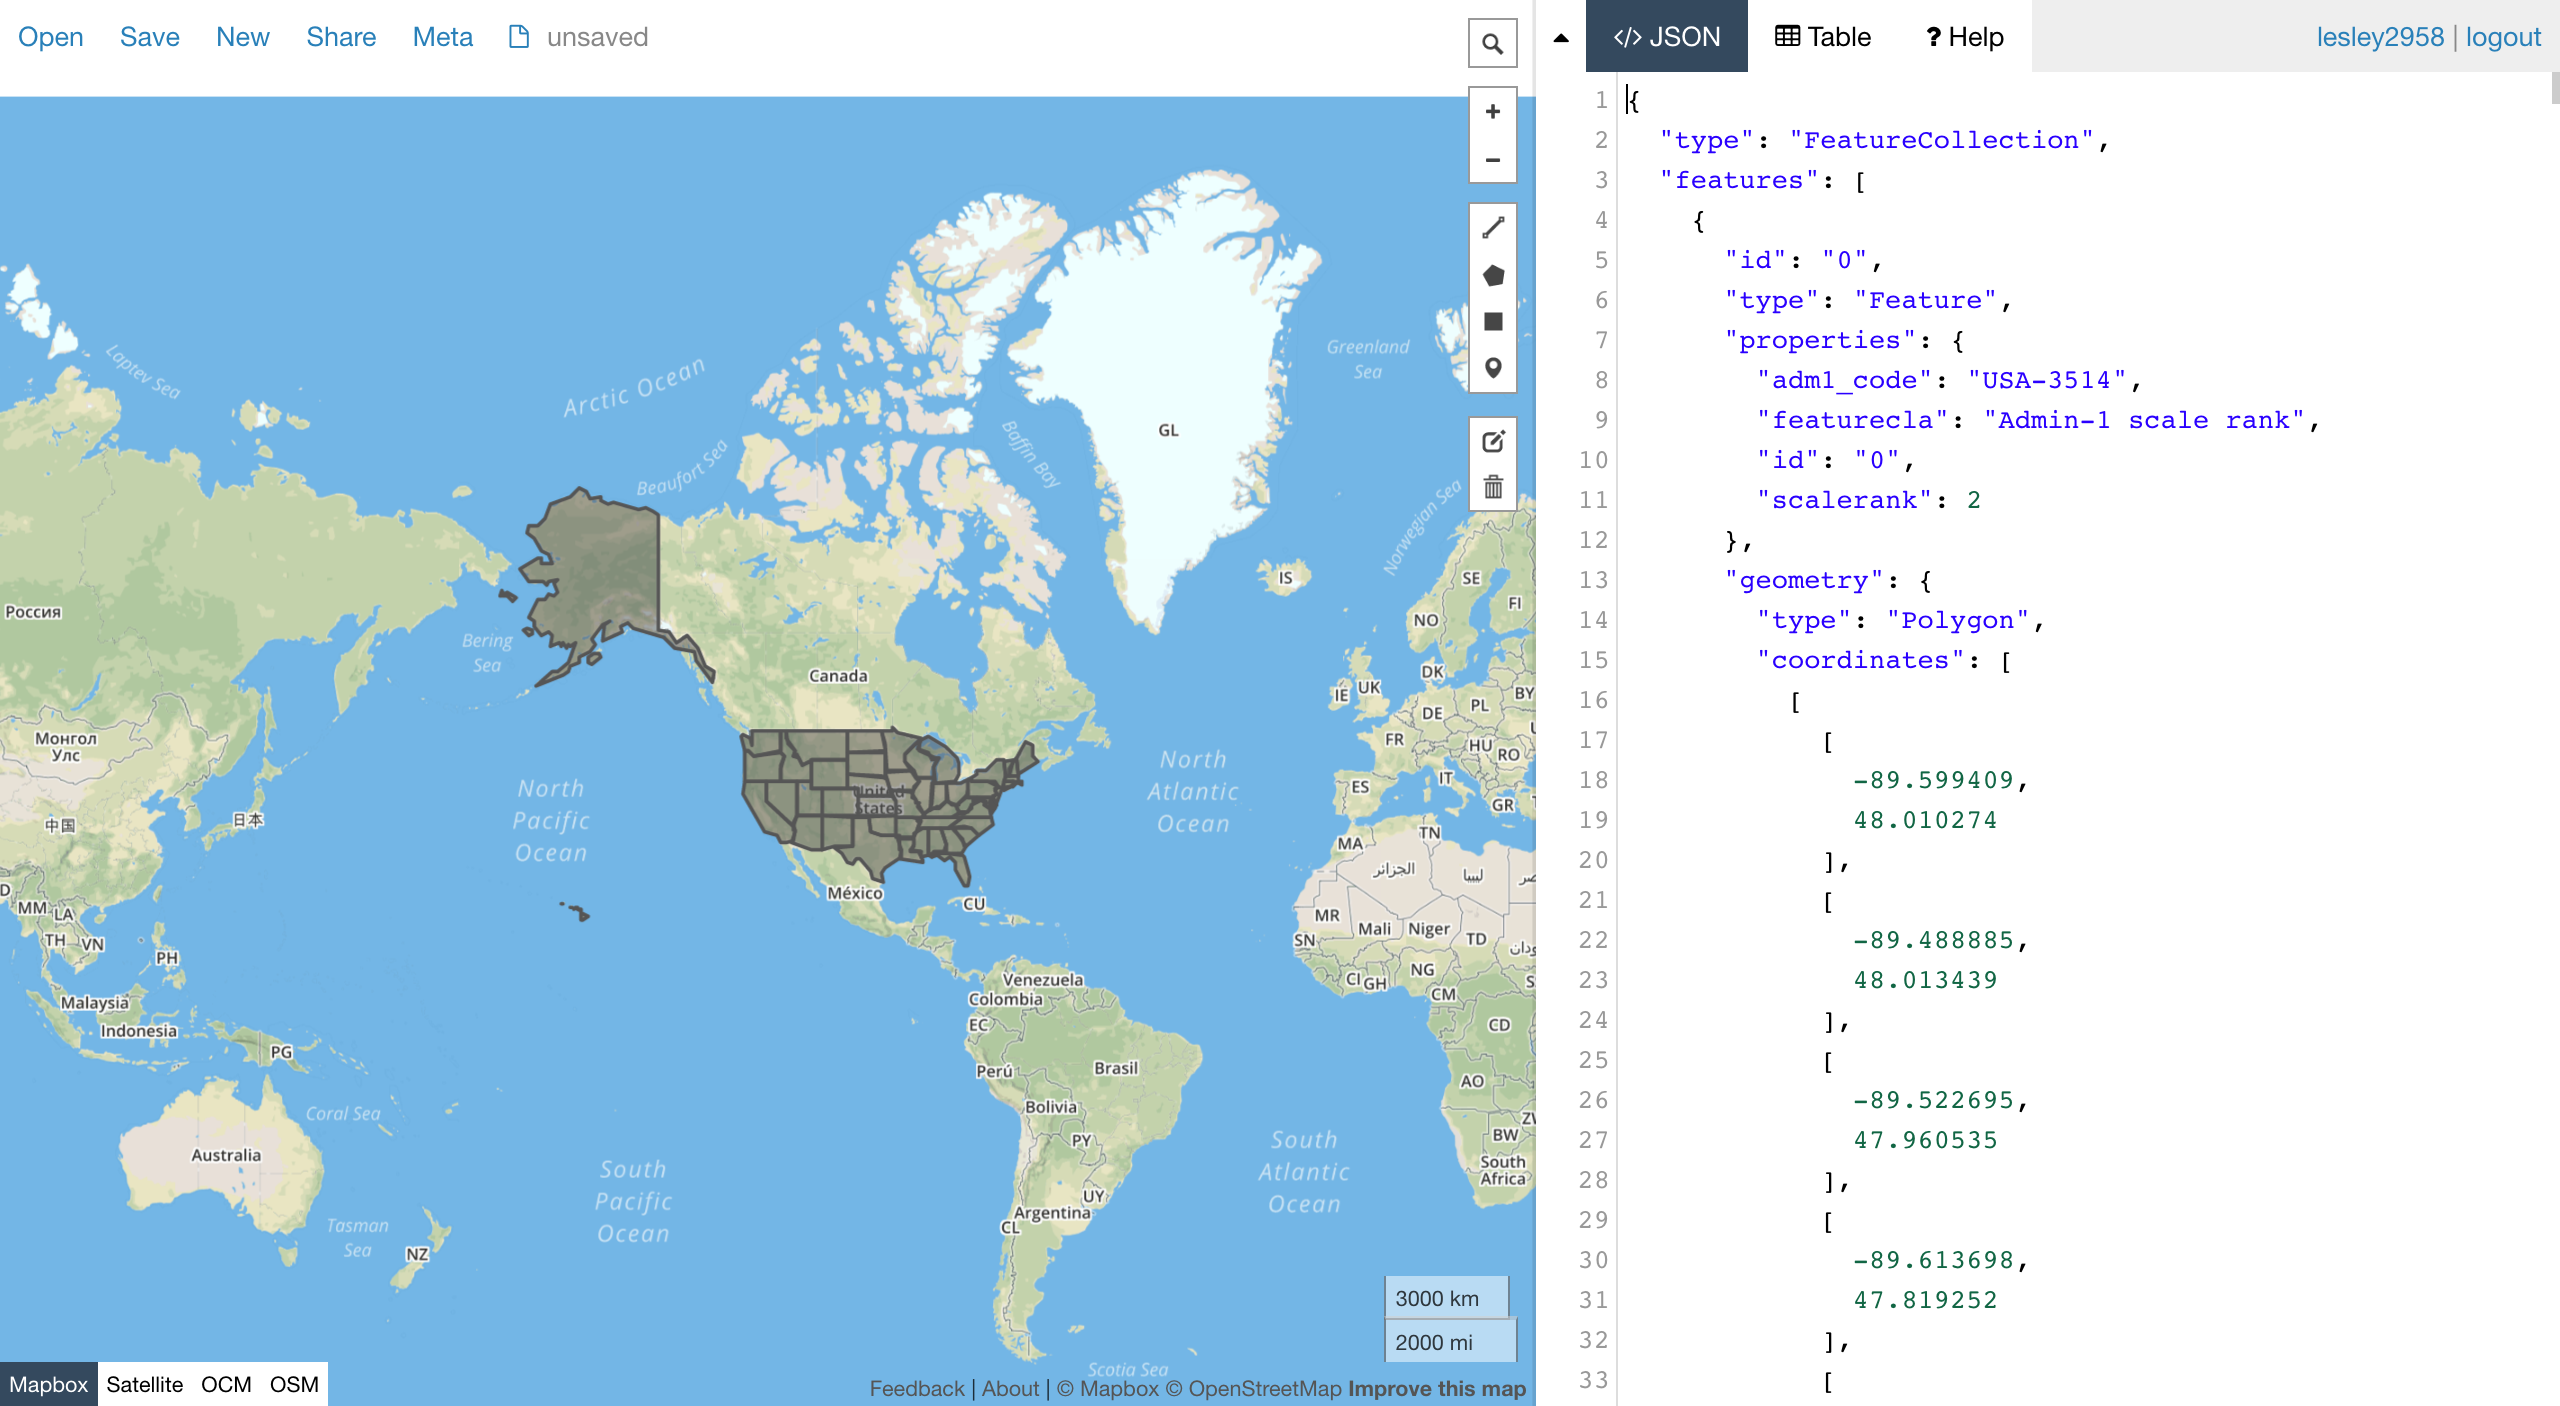


On the left of the page, you can see that the geoJSON displayed and available for editing. If you zoom in and select a geometric object, you'll see that you also have the option to customize it: 

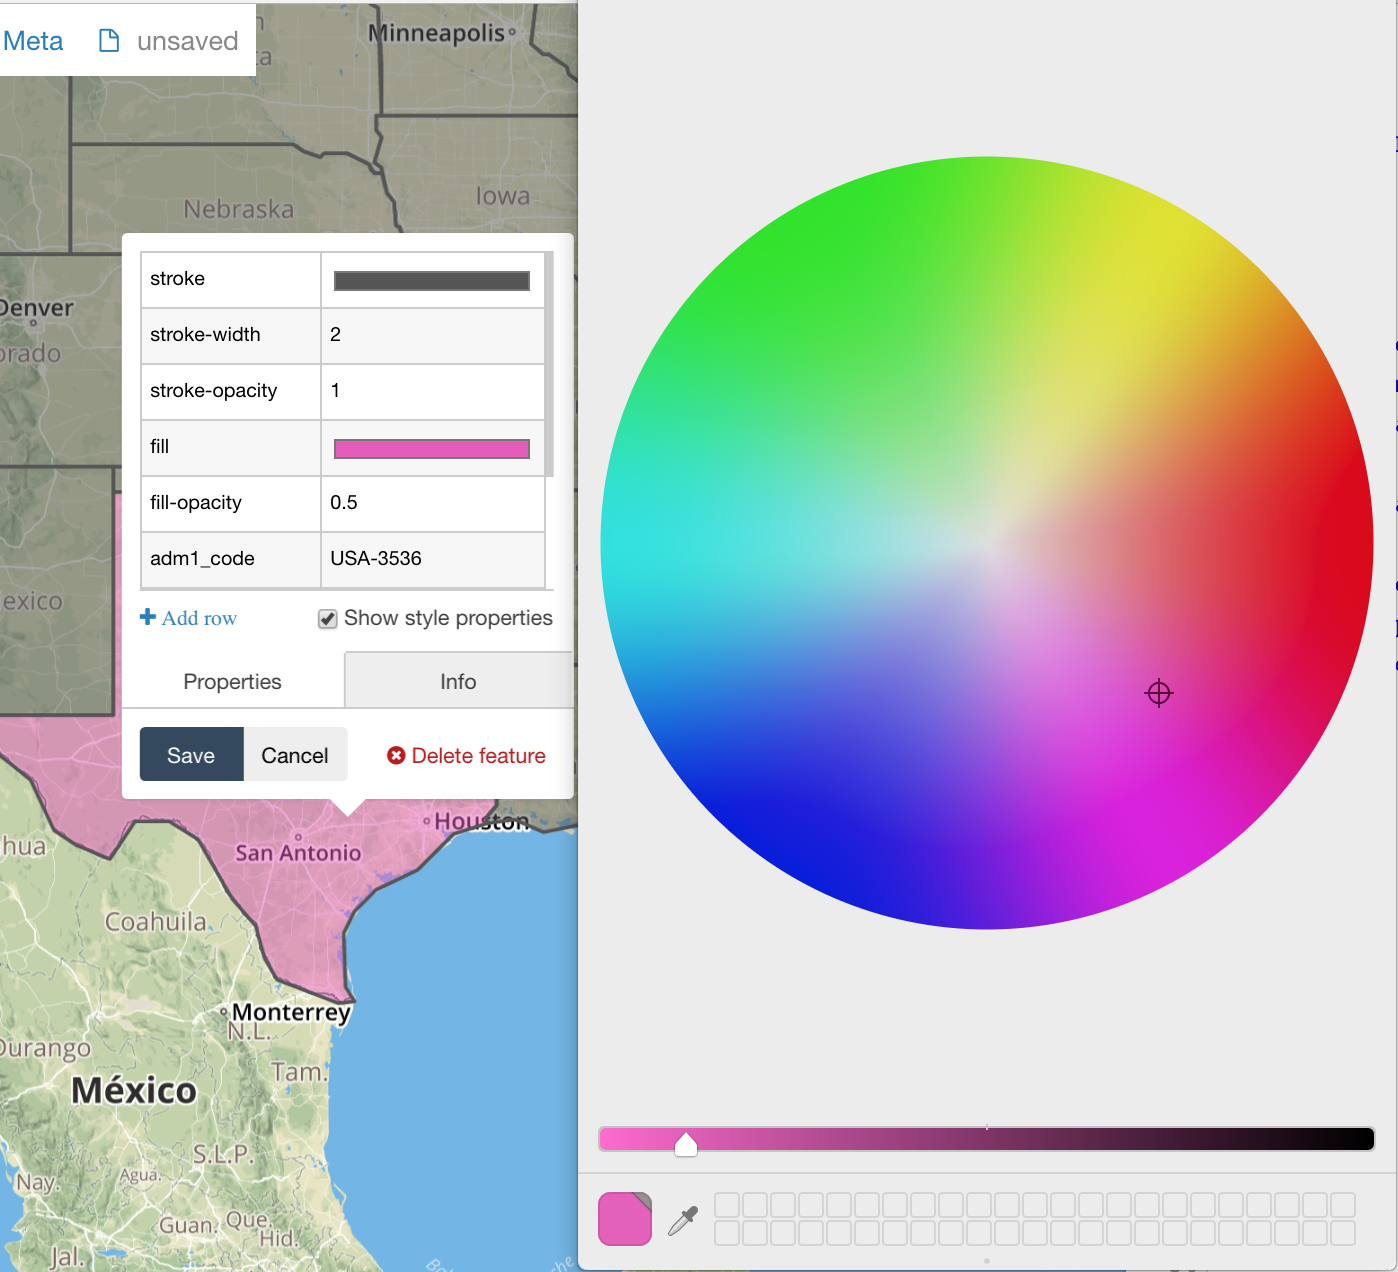

And perhaps most importantly, `geojsonio` has multiple options for sharing your content. First, there's the option to share a link directly: 

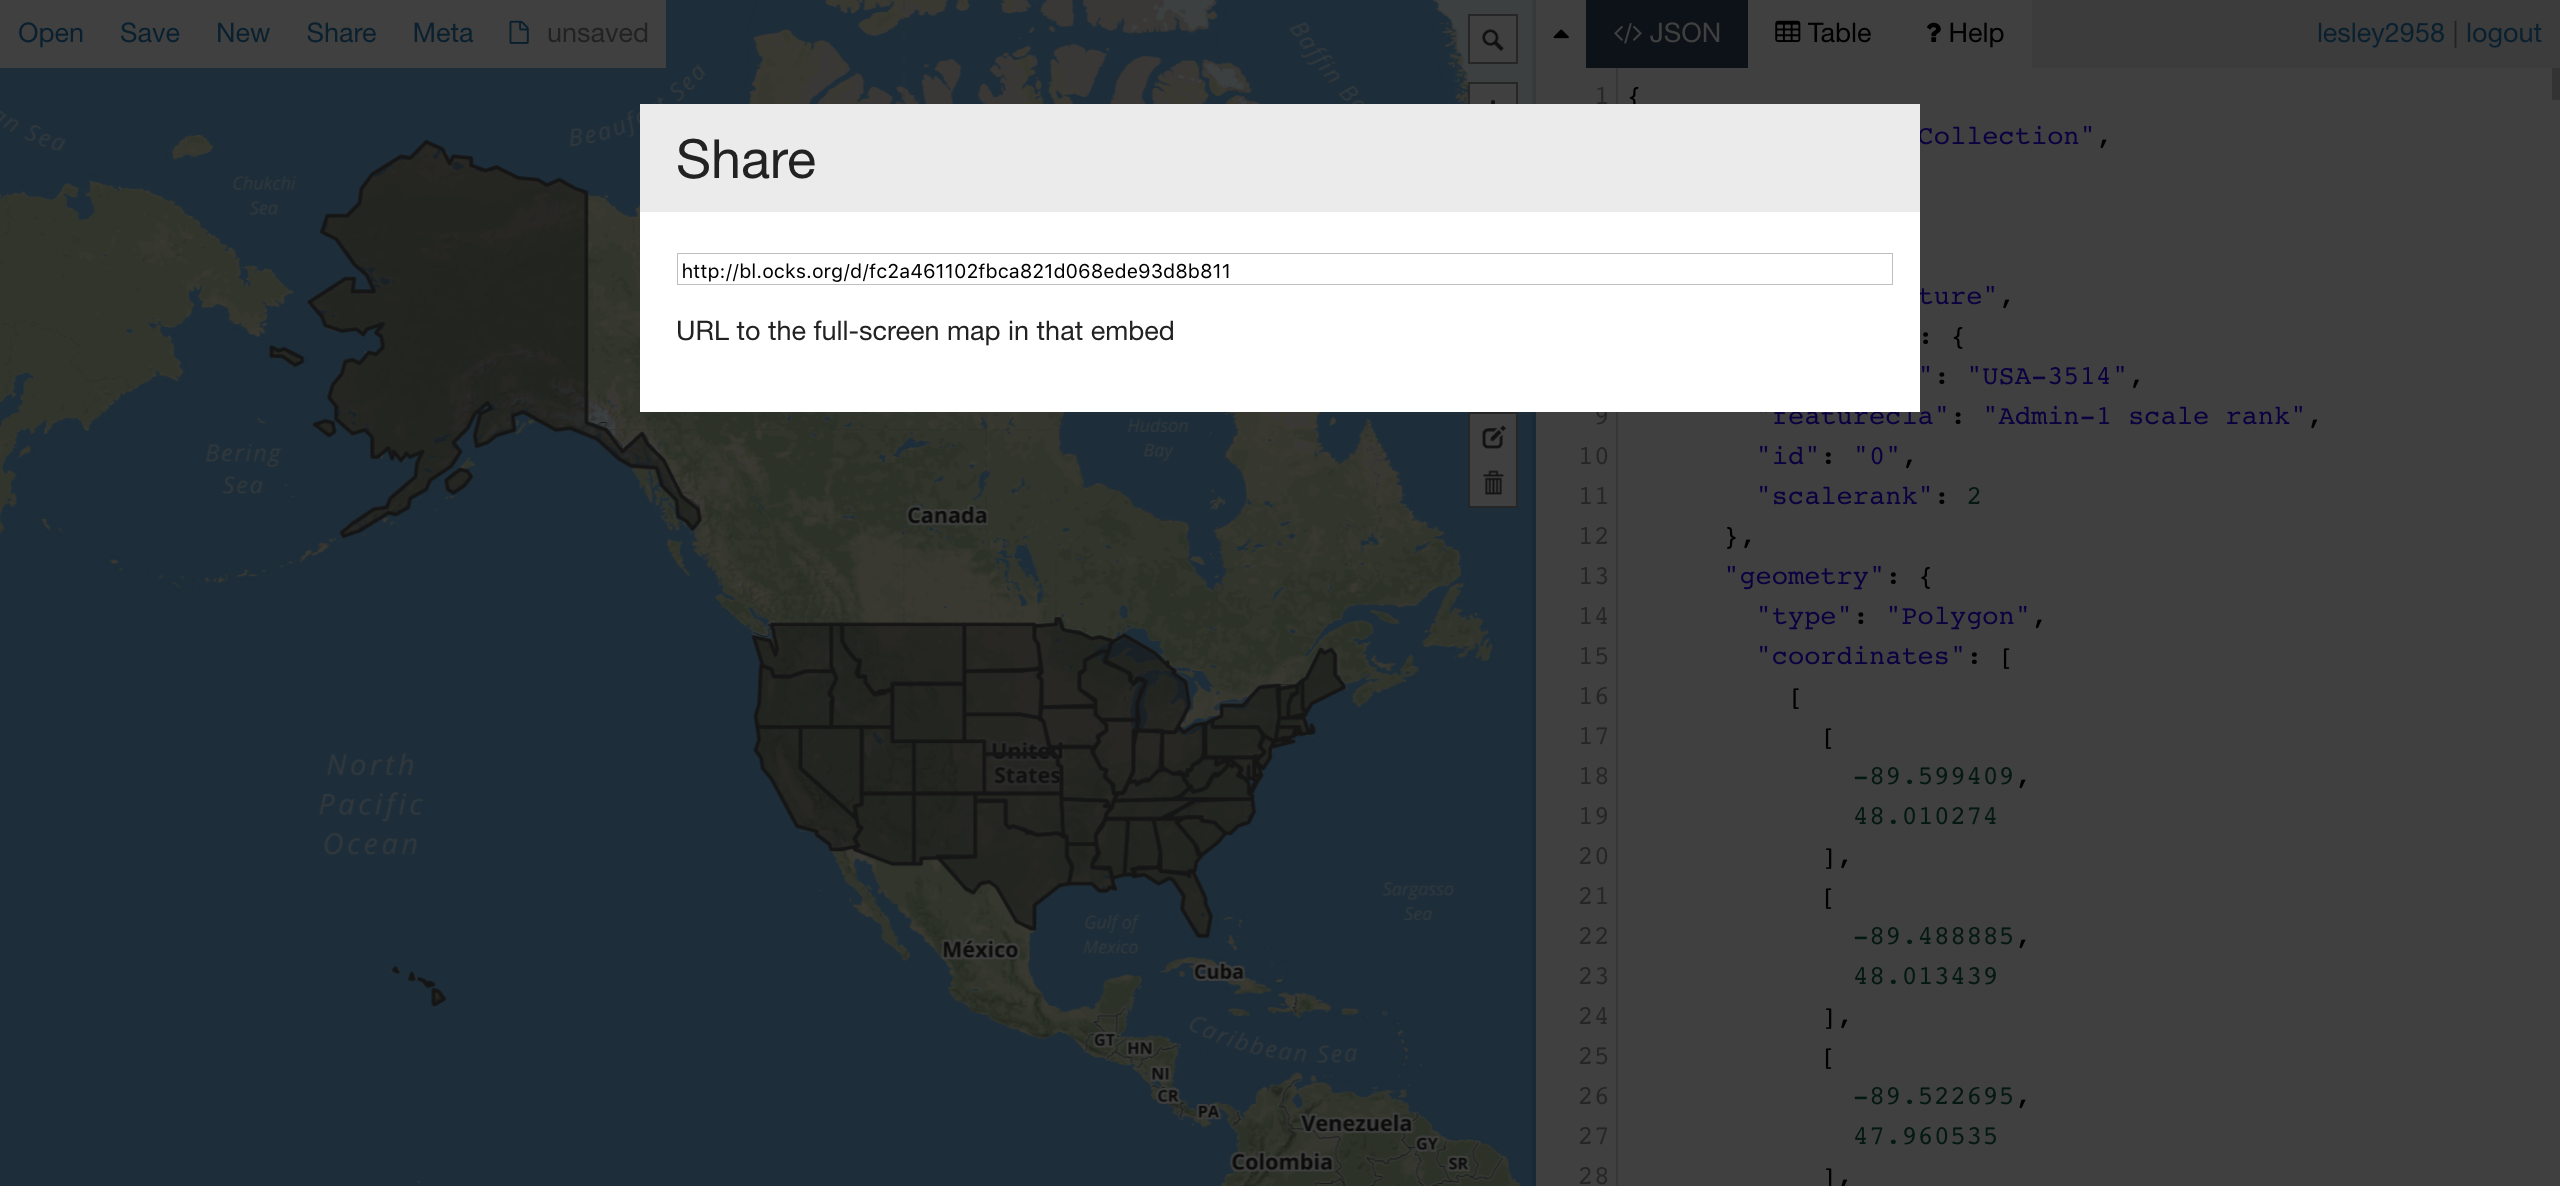

And to everyone's convenience the option to save to github, github gist, geojson, csvs, and various other formats gives developers plenty of flexibility when deciding how to share or host content. 

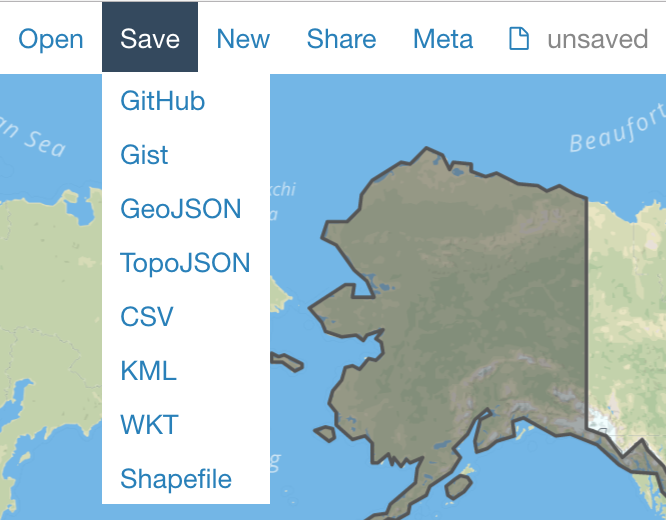

In the example before we used `geopandas` to pass geoJSON to the `display()` function. If no manipulation on the geospatial needs to be performed, we can treat the file as any other and set its contents to a variable:

In [58]:
contents = open('map.geojson').read()
print(contents)

{
    "type": "Point",
    "coordinates": [
		-73.9617,
		40.8067
		]
}




Since JSON is technically a string, the format is still a suitable parameter for the `display()` function. Again, the main difference between using `geopandas` is whether or not any manipulation needs to be done!

This example is simply a point, so besides reading in the json, nothing necessarily has to be done, so we'll just pass in the string directly:

In [59]:
display(contents)

'http://geojson.io/#data=data:application/json,%7B%0A%20%20%20%20%22type%22%3A%20%22Point%22%2C%0A%20%20%20%20%22coordinates%22%3A%20%5B%0A%09%09-73.9617%2C%0A%09%0940.8067%0A%09%09%5D%0A%7D%0A%0A'

And once again, a link is opened in the browser and we have this beautiful visualization of a location in Manhatan. 

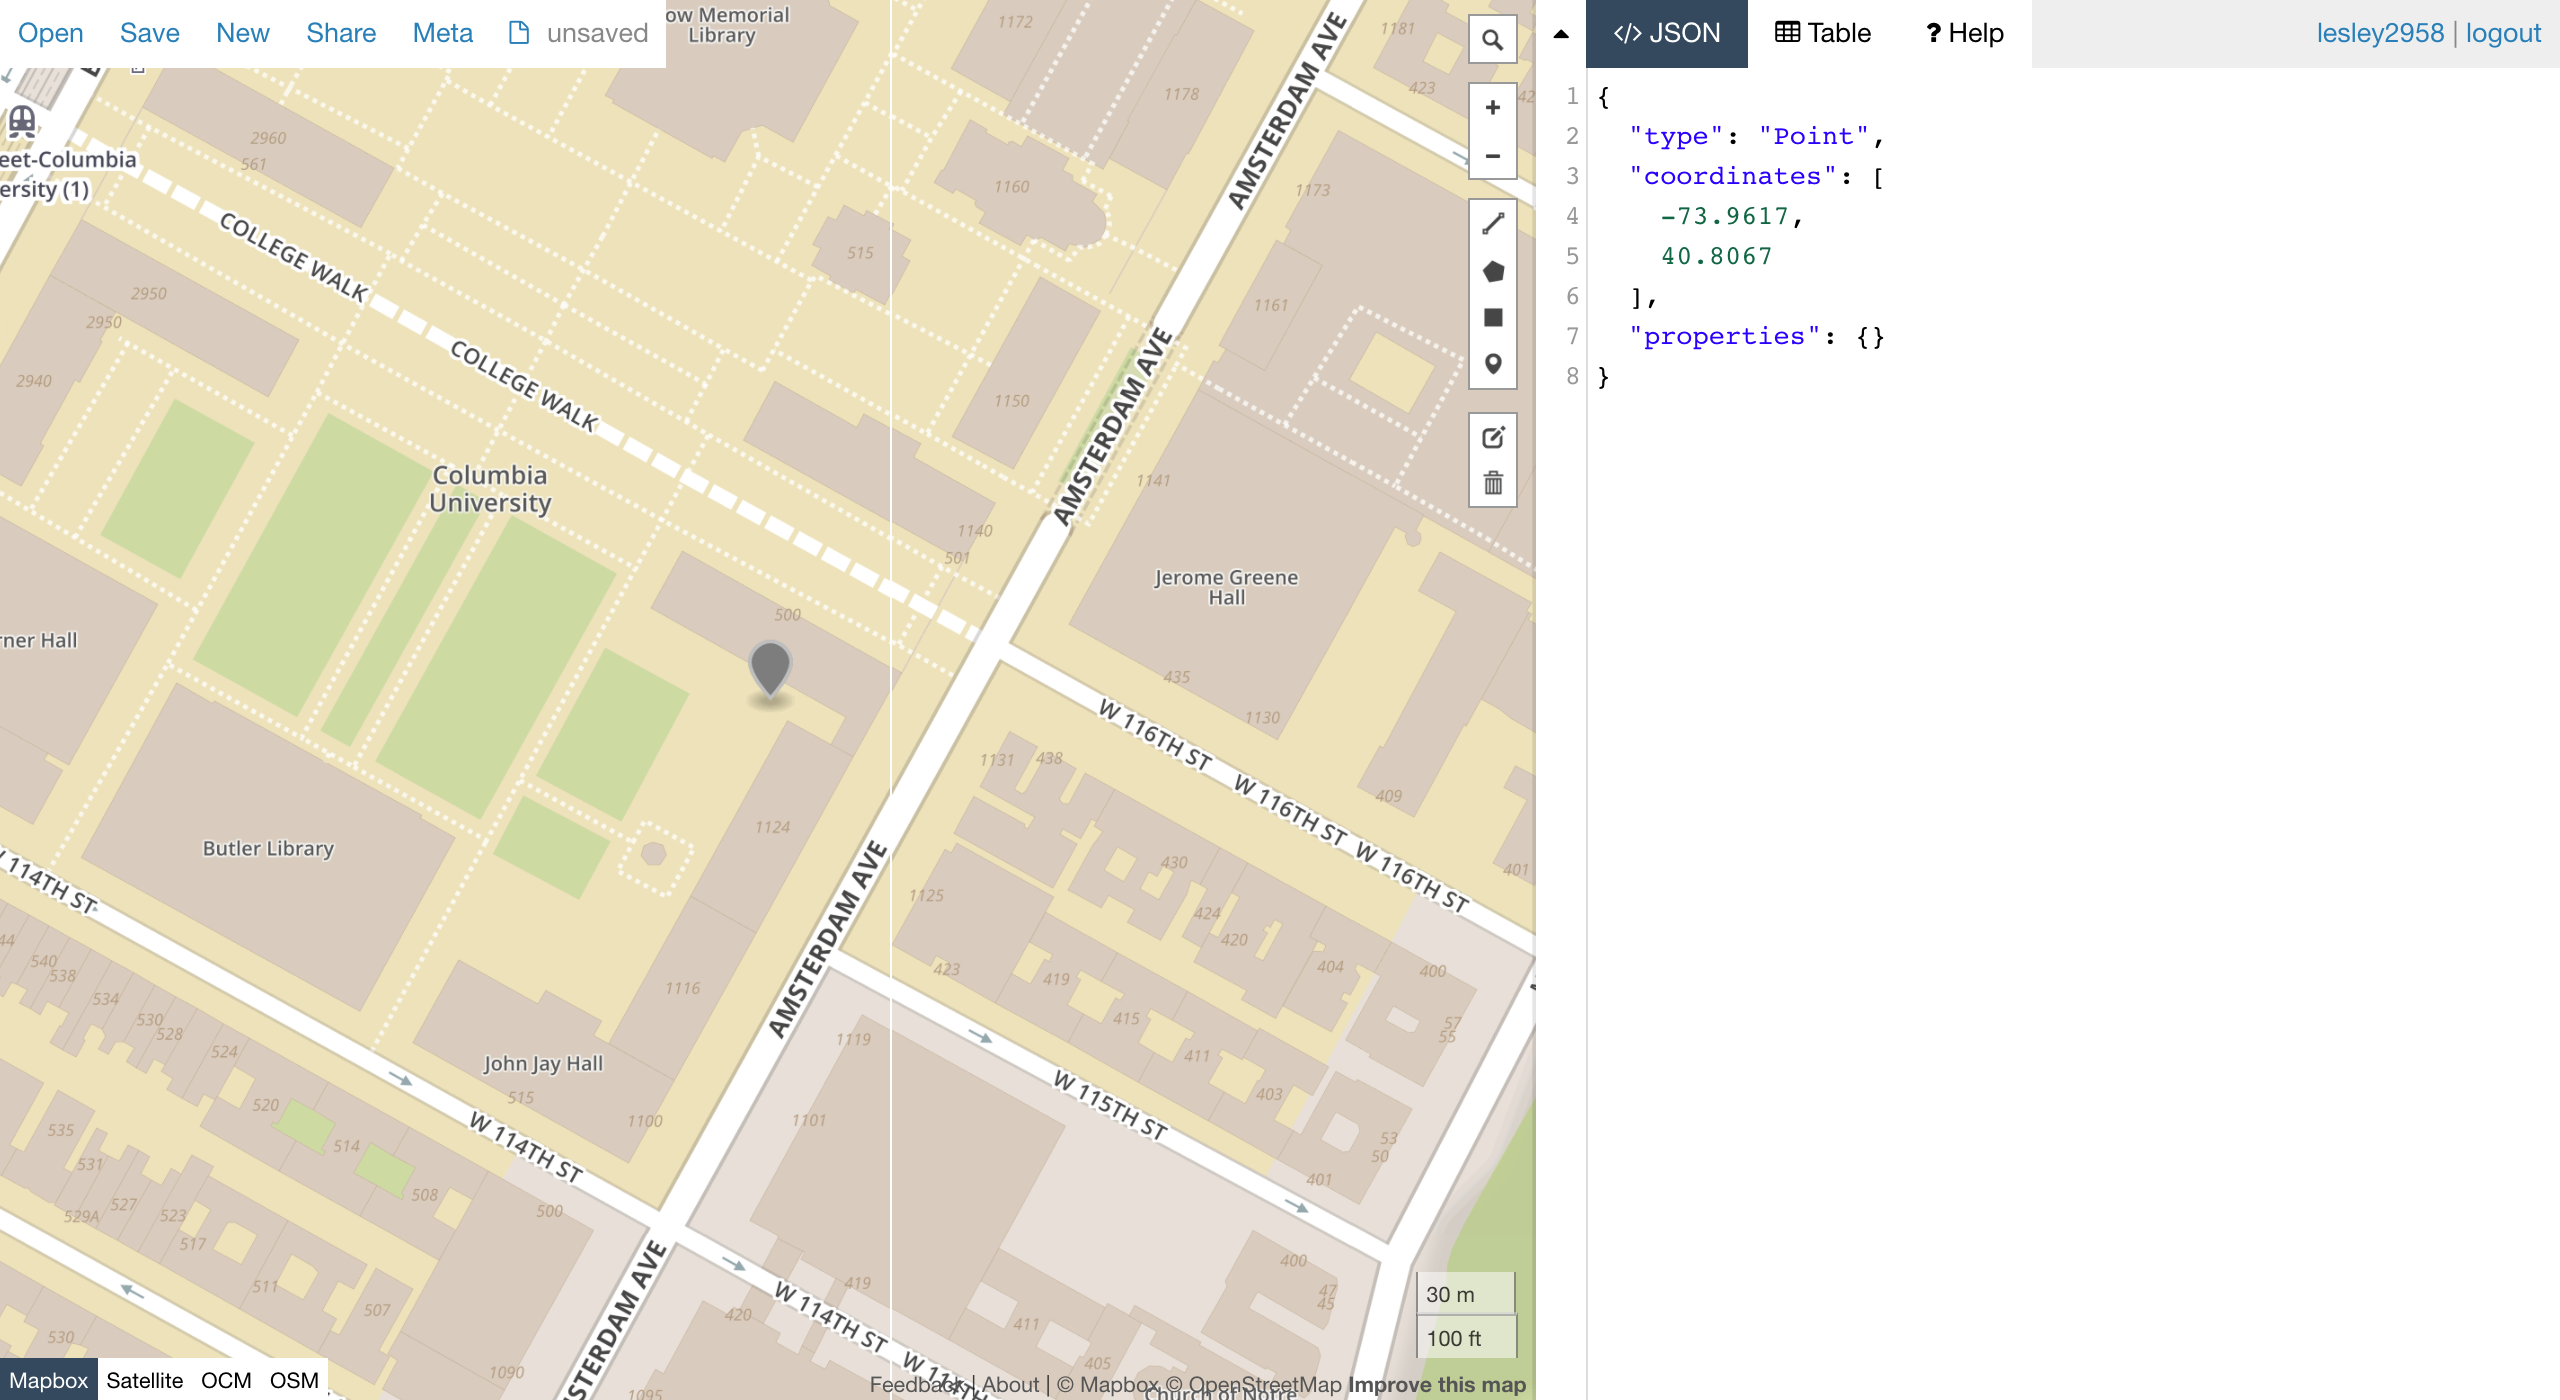

### Geospatial Data Visualization

GeoPandas is a python module used to make working with geospatial data in python easier by extending the datatypes used by pandas to allow spatial operations on geometric types. So now that we know what polygons are, we can set up a map of the United States using data of the coordinates that shape each state. 

Shapely converts feature geometry into GeoJSON structure and contains tools for geometry manipulations. This module works with three of the types of geometric objects we discussed before: points, curves, and surfaces. Descartes works off of shapely for visualizing geometric objects!

First, we import the needed modules.

In [ ]:
from shapely.geometry import shape, LineString, Point
from descartes import PolygonPatch
import fiona
import matplotlib.pyplot as plt

These are some coordinates we'll need to plot the path of a flight from San Francisco to New York. 

In [ ]:
latlons = [(37.766, -122.43), (39.239, -114.89), (38.820, -104.82), (38.039, -97.96),
    (38.940, -92.32), (39.156, -86.53), (40.749, -84.08), (41.494, -81.66),
    (42.325, -80.06), (41.767, -78.01), (41.395, -75.68), (40.625, -73.780)]

print(latlons)

This simply takes the points and reformats the x and y (since it's originally coordinates) and converts it to a LineString type. 

In [ ]:
ls = LineString(latlons)

So now we want to display this on a map. Using some data I found online (which you can access via the github), I turn each of these into polygon with fiona.  

In [ ]:
with fiona.collection("shapefiles/statesp020.shp") as features:
        states = [shape(f['geometry']) for f in features]

fig = plt.figure(figsize=(24, 12), dpi=180)


In order to use plotly, you have to own an account with your own API key. To find these, go into your plotly folder and type the following command into your terminal:

```
vim ~/.plotly/.credentials
```

It should be in the following format - the username and api_key fieds will be especially important.

``` 
{
    "username": "username",
    "stream_ids": [],
    "api_key": "api_key",
    "proxy_username": "",
    "proxy_password": ""    
}
```
And so here we begin. First, as always, we import the needed modules. From there, we initialize our session by signing in on plotly.

In [ ]:
import plotly.plotly as py
from plotly.graph_objs import *

py.sign_in('lc2958', 'xxxxx')

Plotly supports three types of maps - chloropeth, atlas maps, and satelite maps. Using data from the electoral college, we'll plot a map of the United States with a color scale. The darker the color, the greater number of votes.

So first, we load in the electoral college data. 

## Final Words

Most of these techniques are interchangeable in R, but Python is one of the best suitable languages for geospatial analysis. Its modules and tools are built with developers in mind, making the transition into geospatial analysis must easier.

### Resources

[GeoJSON](http://geojson.org/) <br>
[OpenStreetMap](https://www.openstreetmap.org/#map=5/51.500/-0.100) <br>
[CartoDB](https://carto.com/)